# Chapter 2: Accessing Text Corpora and Lexical Resources

Practical work in Natural Language Processing typically uses large bodies of linguistic
data, or **corpora**. The goal of this chapter is to answer the following questions:
1. What are some useful text corpora and lexical resources, and how can we access them with Python?
2. Which Python constructs are most helpful for this work?
3. How do we avoid repeating ourselves when writing Python code?

This chapter continues to present programming concepts by example, in the context
of a linguistic processing task. We will wait until later before exploring each Python
construct systematically. Don’t worry if you see an example that contains something
unfamiliar; simply try it out and see what it does, and—if you’re game—modify it by
substituting some part of the code with a different text or word. This way you will
associate a task with a programming idiom, and learn the hows and whys later.

## 2.1 Accessing Text Corpora
As just mentioned, a text corpus is a large body of text. Many corpora are designed to
contain a careful balance of material in one or more genres. We examined some small
text collections in Chapter 1, such as the speeches known as the US Presidential Inaugural Addresses. This particular corpus actually contains dozens of individual texts—
one per address—but for convenience we glued them end-to-end and treated them as
a single text. Chapter 1 also used various predefined texts that we accessed by typing
`from book import *`. However, since we want to be able to work with other texts, this
section examines a variety of text corpora. We’ll see how to select individual texts, and
how to work with them.

**Gutenberg Corpus**

NLTK includes a small selection of texts from the Project Gutenberg electronic text
archive, which contains some 25,000 free electronic books, hosted at http://www.gu
tenberg.org/. We begin by getting the Python interpreter to load the NLTK package,
then ask to see `nltk.corpus.gutenberg.fileids()`, the file identifiers in this corpus:

In [4]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Let’s pick out the first of these texts—Emma by Jane Austen—and give it a short name,
`emma`, then find out how many words it contains:

In [2]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

When we defined `emma`, we invoked the `words()` function of the `gutenberg` object in
NLTK’s corpus package. But since it is cumbersome to type such long names all the
time, Python provides another version of the import statement, as follows:

In [3]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma = gutenberg.words('austen-emma.txt')

Let’s write a short program to display other information about each text, by looping
over all the values of `fileid` corresponding to the `gutenberg` file identifiers listed earlier
and then computing statistics for each text. For a compact output display, we will make
sure that the numbers are all integers, using `int()`.

In [5]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print(int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


This program displays three statistics for each text: average word length, average sentence length, and the number of times each vocabulary item appears in the text on
average (our lexical diversity score). Observe that average word length appears to be a
general property of English, since it has a recurrent value of 4. (In fact, the average word
length is really 3, not 4, since the `num_chars` variable counts space characters.) By contrast average sentence length and lexical diversity appear to be characteristics of particular authors.

The previous example also showed how we can access the “raw” text of the book 1,
not split up into tokens. The `raw()` function gives us the contents of the file without
any linguistic processing. So, for example, `len(gutenberg.raw('blake-poems.txt')` tells
us how many letters occur in the text, including the spaces between words. The
sents() function divides the text up into its sentences, where each sentence is a list of
words:

In [6]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [7]:
macbeth_sentences[1037]

['Good', 'night', ',', 'and', 'better', 'health', 'Attend', 'his', 'Maiesty']

In [8]:
longest_len = max([len(s) for s in macbeth_sentences])
[s for s in macbeth_sentences if len(s) == longest_len]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

**Web and Chat Text**

Although Project Gutenberg contains thousands of books, it represents established
literature. It is important to consider less formal language as well. NLTK’s small collection of web text includes content from a Firefox discussion forum, conversations
overheard in New York, the movie script of *Pirates of the Carribean*, personal advertisements, and wine reviews:

In [9]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


**Brown Corpus**

The Brown Corpus was the first million-word electronic corpus of English, created in
1961 at Brown University. This corpus contains text from 500 sources, and the sources
have been categorized by genre, such as news, editorial, and so on. Table 2-1 gives an
example of each genre (for a complete list, see http://icame.uib.no/brown/bcm-los.html).

We can access the corpus as a list of words or a list of sentences (where each sentence
is itself just a list of words). We can optionally specify particular categories or files to
read:

In [10]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [11]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [12]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

Next, we need to obtain counts for each genre of interest. We’ll use NLTK’s support
for conditional frequency distributions. These are presented systematically in Section 2.2, where we also unpick the following code line by line. For the moment, you
can ignore the details and just concentrate on the output.

In [14]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


**Reuters Corpus**

The Reuters Corpus contains 10,788 news documents totaling 1.3 million words. The
documents have been classified into 90 topics, and grouped into two sets, called “training” and “test”; thus, the text with fileid `'test/14826'` is a document drawn from the test set. This split is for training and testing algorithms that automatically detect the topic of a document, as we will see in Chapter 6.

In [16]:
from nltk.corpus import reuters

reuters.fileids()
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

Unlike the Brown Corpus, categories in the Reuters Corpus overlap with each other,
simply because a news story often covers multiple topics. We can ask for the topics covered by one or more documents, or for the documents included in one or more
categories. For convenience, the corpus methods accept a single fileid or a list of fileids.

In [17]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [18]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [19]:
reuters.fileids('barley')

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [20]:
reuters.fileids(['barley', 'corn'])

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

Similarly, we can specify the words or sentences we want in terms of files or categories.
The first handful of words in each of these texts are the titles, which by convention are
stored as uppercase

In [21]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [22]:
reuters.words(['training/9865', 'training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

**Inaugural Address Corpus**

In Section 1.1, we looked at the Inaugural Address Corpus, but treated it as a single
text. The graph in Figure 1-2 used “word offset” as one of the axes; this is the numerical
index of the word in the corpus, counting from the first word of the first address.
However, the corpus is actually a collection of 55 texts, one for each presidential address. An interesting property of this collection is its time dimension:

In [24]:
from nltk.corpus import inaugural
inaugural.fileids()
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017']

Notice that the year of each text appears in its filename. To get the year out of the
filename, we extracted the first four characters, using `fileid[:4]`.

Let’s look at how the words America and citizen are used over time. The following code
converts the words in the Inaugural corpus to lowercase using `w.lower()` , then checks
whether they start with either of the “targets” america or citizen using `startswith()`
. Thus it will count words such as American’s and Citizens. We’ll learn about conditional frequency distributions in Section 2.2; for now, just consider the output, shown
in Figure 2-1.

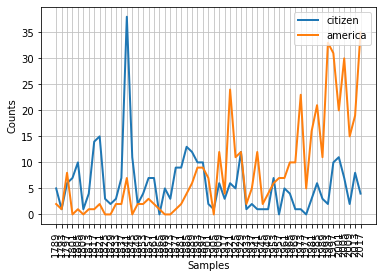

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
cfd = nltk.ConditionalFreqDist(
     (target, fileid[:4])
     for fileid in inaugural.fileids()
     for w in inaugural.words(fileid)
     for target in ['america', 'citizen']
     if w.lower().startswith(target))

cfd.plot()

**Annotated Text Corpora**

Many text corpora contain linguistic annotations, representing part-of-speech tags,
named entities, syntactic structures, semantic roles, and so forth. NLTK provides
convenient ways to access several of these corpora, and has data packages containing
corpora and corpus samples, freely downloadable for use in teaching and research.
Table 2-2 lists some of the corpora. For information about downloading them, see
http://www.nltk.org/data. For more examples of how to access NLTK corpora, please
consult the Corpus HOWTO at http://www.nltk.org/howto.

**Corpora in Other Languages**

NLTK comes with corpora for many languages, though in some cases you will need to
learn how to manipulate character encodings in Python before using these corpora (see
Section 3.3).

In [28]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [29]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [30]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [33]:
#nltk.corpus.udhr.fileids()

In [32]:
 nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

The last of these corpora, udhr, contains the Universal Declaration of Human Rights
in over 300 languages. The fileids for this corpus include information about the character encoding used in the file, such as **UTF8** or **Latin1**. Let’s use a conditional frequency distribution to examine the differences in word lengths for a selection of languages included in the udhr corpus. The output is shown in Figure 2-2 (run the program yourself to see a color plot). Note that **Tru**e and **False** are Python’s built-in Boolean values.

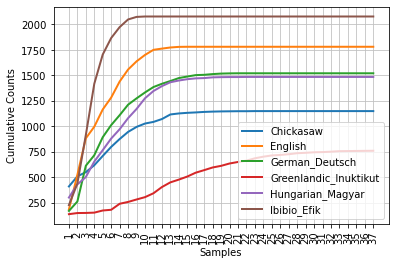

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [35]:
from nltk.corpus import udhr

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

cfd.plot(cumulative=True)

**Text Corpus Structure**

We have seen a variety of corpus structures so far; these are summarized in Figure 2-3. The simplest kind lacks any structure: it is just a collection of texts. Often,
texts are grouped into categories that might correspond to genre, source, author, language, etc. Sometimes these categories overlap, notably in the case of topical categories,
as a text can be relevant to more than one topic. Occasionally, text collections have
temporal structure, news collections being the most common example.

![](images/2.1.png)

*Figure 2-3. Common structures for text corpora: The simplest kind of corpus is a collection of isolated
texts with no particular organization; some corpora are structured into categories, such as genre
(Brown Corpus); some categorizations overlap, such as topic categories (Reuters Corpus); other
corpora represent language use over time (Inaugural Address Corpus)*

**Loading Your Own Corpus**
If you have a your own collection of text files that you would like to access using the
methods discussed earlier, you can easily load them with the help of NLTK’s Plain
textCorpusReader. Check the location of your files on your file system; in the following
example, we have taken this to be the directory /usr/share/dict. Whatever the location,
set this to be the value of corpus_root . The second parameter of the `PlaintextCorpusReader` initializer can be a list of fileids, like `['a.txt', 'test/b.txt']`, or a pattern
that matches all fileids, like `'[abc]/.*\.txt'` (see Section 3.4 for information about
regular expressions).

## 2.2 Conditional Frequency Distributions
We introduced frequency distributions in Section 1.3. We saw that given some list
mylist of words or other items, FreqDist(mylist) would compute the number of
occurrences of each item in the list. Here we will generalize this idea.

When the texts of a corpus are divided into several categories (by genre, topic, author,
etc.), we can maintain separate frequency distributions for each category. This will
allow us to study systematic differences between the categories. In the previous section,
we achieved this using NLTK’s ConditionalFreqDist data type. A **conditional frequency distribution** is a collection of frequency distributions, each one for a different
“condition.” The condition will often be the category of the text. Figure 2-4 depicts a
fragment of a conditional frequency distribution having just two conditions, one for
news text and one for romance text.

**Conditions and Events**

A frequency distribution counts observable events, such as the appearance of words in
a text. A conditional frequency distribution needs to pair each event with a condition.
So instead of processing a sequence of words , we have to process a sequence of
pairs :

In [36]:
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]

Each pair has the form *(condition, event)*. If we were processing the entire Brown
Corpus by genre, there would be 15 conditions (one per genre) and 1,161,192 events
(one per word).

**Counting Words by Genre**
In Section 2.1, we saw a conditional frequency distribution where the condition was
the section of the Brown Corpus, and for each condition we counted words. Whereas
`FreqDist()` takes a simple list as input, `ConditionalFreqDist()` takes a list of pairs.

In [37]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

**Plotting and Tabulating Distributions**

Apart from combining two or more frequency distributions, and being easy to initialize,
a `ConditionalFreqDist` provides some useful methods for tabulation and plotting. The plot in Figure 2-1 was based on a conditional frequency distribution reproduced
in the following code. The condition is either of the words america or citizen , and
the counts being plotted are the number of times the word occurred in a particular
speech. It exploits the fact that the filename for each speech—for example,
1865-Lincoln.txt—contains the year as the first four characters . This code generates
the pair `('america', '1865')` for every instance of a word whose lowercased form starts
with america—such as Americans—in the file 1865-Lincoln.txt.

In [38]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

**Generating Random Text with Bigrams**

We can use a conditional frequency distribution to create a table of bigrams (word
pairs, introduced in Section 1.3). The `bigrams()` function takes a list of words and builds
a list of consecutive word pairs:

In [40]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
nltk.bigrams(sent)

<generator object bigrams at 0x0000017595F30890>


## 2.3 More Python: Reusing Code
By this time you’ve probably typed and retyped a lot of code in the Python interactive
interpreter. If you mess up when retyping a complex example, you have to enter it again.
Using the arrow keys to access and modify previous commands is helpful but only goes
so far. In this section, we see two important ways to reuse code: text editors and Python
functions.

## 2.4 Lexical Resources
A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information, such as part-of-speech and sense definitions. Lexical resources are
secondary to texts, and are usually created and enriched with the help of texts. For
example, if we have defined a text `my_text`, then `vocab = sorted(set(my_text))` builds
the vocabulary of `my_text`, whereas `word_freq = FreqDist(my_text)` counts the frequency of each word in the text. Both `vocab` and `word_freq` are simple lexical resources.
Similarly, a concordance like the one we saw in Section 1.1 gives us information about
word usage that might help in the preparation of a dictionary. Standard terminology
for lexicons is illustrated in Figure 2-5. A **lexical entry** consists of a **headword** (also known as a **lemma**) along with additional information, such as the part-of-speech and the sense definition. Two distinct words having the same spelling are called
**homonyms**.

![](images/2.2.png) 

The simplest kind of lexicon is nothing more than a sorted list of words. Sophisticated
lexicons include complex structure within and across the individual entries. In this
section, we’ll look at some lexical resources included with NLTK.

**Wordlist Corpora**

NLTK includes some corpora that are nothing more than wordlists. The Words Corpus
is the */usr/dict/words* file from Unix, used by some spellcheckers. We can use it to find
unusual or misspelled words in a text corpus, as shown in Example 2-3.

In [41]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

In [43]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:10]

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations']

In [44]:
 unusual_words(nltk.corpus.nps_chat.words())[:10]

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams']

There is also a corpus of **stopwords**, that is, high-frequency words such as the, to, and
also that we sometimes want to filter out of a document before further processing.
Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

Let’s define a function to compute what fraction of words in a text are not in the stopwords list:

In [47]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

content_fraction(nltk.corpus.reuters.words())

0.735240435097661

One more wordlist corpus is the Names Corpus, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. Let’s find names
that appear in both files, i.e., names that are ambiguous for gender:

In [49]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [50]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names][:20]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel']

It is well known that names ending in the letter a are almost always female. We can see
this and some other patterns in the graph in Figure 2-7, produced by the following code.
Remember that `name[-1]` is the last letter of `name`.

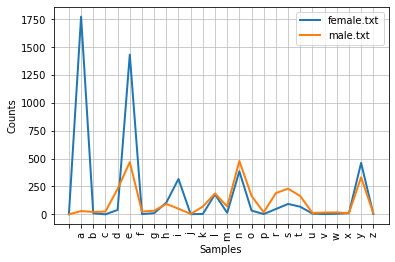

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [51]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

**A Pronouncing Dictionary**

A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word
plus some properties in each row. NLTK includes the CMU Pronouncing Dictionary
for U.S. English, which was designed for use by speech synthesizers.

In [5]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [53]:
for entry in entries[39943:39951]:
    print(entry)

('explorer', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'ER0'])
('explorers', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'ER0', 'Z'])
('explores', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'Z'])
('exploring', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'IH0', 'NG'])
('explosion', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'ZH', 'AH0', 'N'])
('explosions', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'ZH', 'AH0', 'N', 'Z'])
('explosive', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'S', 'IH0', 'V'])
('explosively', ['EH2', 'K', 'S', 'P', 'L', 'OW1', 'S', 'IH0', 'V', 'L', 'IY0'])


For each word, this lexicon provides a list of phonetic codes—distinct labels for each
contrastive sound—known as *phones*. Observe that *fire* has two pronunciations (in
U.S. English): the one-syllable **F AY1 R**, and the two-syllable **F AY1 ER0**. The symbols
in the CMU Pronouncing Dictionary are from the Arpabet, described in more detail at
http://en.wikipedia.org/wiki/Arpabet

In [6]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print (word, ph2)

pait EY1
pat AE1
pate EY1
patt AE1
peart ER1
peat IY1
peet IY1
peete IY1
pert ER1
pet EH1
pete IY1
pett EH1
piet IY1
piette IY1
pit IH1
pitt IH1
pot AA1
pote OW1
pott AA1
pout AW1
puett UW1
purt ER1
put UH1
putt AH1


Here’s another example of the same `for` statement, this time used inside a list comprehension. This program finds all words whose pronunciation ends with a syllable
sounding like nicks. You could use this method to find rhyming words.

In [9]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable][:20]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'"]

The phones contain digits to represent primary stress (1), secondary stress (2), and no
stress (0). As our final example, we define a function to extract the stress digits and then
scan our lexicon to find words having a particular stress pattern.

In [10]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']][:20]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated']

We can use a conditional frequency distribution to help us find minimally contrasting
sets of words. Here we find all the p words consisting of three sounds , and group
them according to their first and last sounds .

In [11]:
p3 = [(pron[0]+'-'+pron[2], word)
    for (word, pron) in entries
    if pron[0] == 'P' and len(pron) == 3]

cfd = nltk.ConditionalFreqDist(p3)
for template in cfd.conditions():
    if len(cfd[template]) > 10:
        words = cfd[template].keys()
        wordlist = ' '.join(words)
        print (template, wordlist[:70] + "...")

P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-Z pais paiz pao's pas pause paws pays paz peas pease pei's perz pez pies...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...


Rather than iterating over the whole dictionary, we can also access it by looking up
particular words. We will use Python’s dictionary data structure, which we will study
systematically in Section 5.3. We look up a dictionary by specifying its name, followed
by a **key** (such as the word 'fire') inside square brackets .

In [12]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

**Comparative Wordlists**

Another example of a tabular lexicon is the **comparative wordlist**. NLTK includes
so-called **Swadesh wordlists**, lists of about 200 common words in several languages.
The languages are identified using an ISO 639 two-letter code.

In [13]:
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [15]:
swadesh.words('en')[:20]

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there',
 'who',
 'what',
 'where',
 'when',
 'how',
 'not',
 'all',
 'many',
 'some',
 'few']

We can access cognate words from multiple languages using the `entries()` method,
specifying a list of languages. With one further step we can convert this into a simple
dictionary (we’ll learn about `dict()` in Section 5.3).

In [17]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en[:20]

[('je', 'I'),
 ('tu, vous', 'you (singular), thou'),
 ('il', 'he'),
 ('nous', 'we'),
 ('vous', 'you (plural)'),
 ('ils, elles', 'they'),
 ('ceci', 'this'),
 ('cela', 'that'),
 ('ici', 'here'),
 ('là', 'there'),
 ('qui', 'who'),
 ('quoi', 'what'),
 ('où', 'where'),
 ('quand', 'when'),
 ('comment', 'how'),
 ('ne...pas', 'not'),
 ('tout', 'all'),
 ('plusieurs', 'many'),
 ('quelques', 'some'),
 ('peu', 'few')]

In [18]:
translate = dict(fr2en)
translate['chien']

'dog'

We can make our simple translator more useful by adding other source languages. Let’s
get the German-English and Spanish-English pairs, convert each to a dictionary using
dict(), then `update` our original `translate` dictionary with these additional mappings:

In [19]:
de2en = swadesh.entries(['de', 'en']) # German-English
es2en = swadesh.entries(['es', 'en']) # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund']

'dog'

**Shoebox and Toolbox Lexicons**

Perhaps the single most popular tool used by linguists for managing data is Toolbox,
previously known as Shoebox since it replaces the field linguist’s traditional shoebox
full of file cards. Toolbox is freely downloadable from http://www.sil.org/computing/
toolbox/.
A Toolbox file consists of a collection of entries, where each entry is made up of one
or more fields. Most fields are optional or repeatable, which means that this kind of
lexical resource cannot be treated as a table or spreadsheet.
Here is a dictionary for the Rotokas language. We see just the first entry, for the word
kaa, meaning “to gag”:

In [22]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')[:5]

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

Entries consist of a series of attribute-value pairs, such as `('ps', 'V')` to indicate that
the part-of-speech is 'V' (verb), and `('ge', 'gag')` to indicate that the gloss-intoEnglish is 'gag'. The last three pairs contain an example sentence in Rotokas and its
translations into Tok Pisin and English.

## 2.5 WordNet
**WordNet** is a semantically oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287
words and 117,659 synonym sets. We’ll begin by looking at synonyms and how they
are accessed in WordNet.

**Senses and Synonyms**

Consider the sentence in (1a). If we replace the word *motorcar* in (1a) with *automobile*, to get (1b), the meaning of the sentence stays pretty much the same:
* a. Benz is credited with the invention of the motorcar.
- b. Benz is credited with the invention of the automobile.

Since everything else in the sentence has remained unchanged, we can conclude that
the words *motorcar* and *automobile* have the same meaning, i.e., they are **synonyms**.
We can explore these words with the help of WordNet:

In [2]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

Thus, *motorcar* has just one possible meaning and it is identified as `car.n.01`, the first
noun sense of car. The entity `car.n.01` is called a **synset**, or “synonym set,” a collection
of synonymous words (or “lemmas”):

In [3]:
 wn.synset('car.n.01').lemma_names

<bound method Synset.lemma_names of Synset('car.n.01')>

Each word of a synset can have several meanings, e.g., car can also signify a train carriage, a gondola, or an elevator car. However, we are only interested in the single
meaning that is common to all words of this synset. Synsets also come with a prose
definition and some example sentences:

In [4]:
wn.synset('car.n.01').definition

<bound method Synset.definition of Synset('car.n.01')>

In [5]:
wn.synset('car.n.01').examples

<bound method Synset.examples of Synset('car.n.01')>

Although definitions help humans to understand the intended meaning of a synset, the
words of the synset are often more useful for our programs. To eliminate ambiguity,
we will identify these words as car.n.01.automobile, car.n.01.motorcar, and so on.
This pairing of a synset with a word is called a lemma. We can get all the lemmas for
a given synset (1), look up a particular lemma (2), get the synset corresponding to a lemma (3), and get the “name” of a lemma (4):

In [8]:
wn.synset('car.n.01').lemmas #(1)
wn.lemma('car.n.01.automobile') #(2)
wn.lemma('car.n.01.automobile').synset #(3)
wn.lemma('car.n.01.automobile').name #(4)

<bound method Lemma.name of Lemma('car.n.01.automobile')>

Unlike the words *automobile* and *motorcar*, which are unambiguous and have one synset, the word *car* is ambiguous, having five synsets:

In [9]:
wn.synsets('car')
for synset in wn.synsets('car'):
    print (synset.lemma_names)

<bound method Synset.lemma_names of Synset('car.n.01')>
<bound method Synset.lemma_names of Synset('car.n.02')>
<bound method Synset.lemma_names of Synset('car.n.03')>
<bound method Synset.lemma_names of Synset('car.n.04')>
<bound method Synset.lemma_names of Synset('cable_car.n.01')>


**The WordNet Hierarchy**
WordNet synsets correspond to abstract concepts, and they don’t always have corresponding words in English. These concepts are linked together in a hierarchy. Some
concepts are very general, such as *Entity*, *State*, *Event*; these are called **unique beginners** or root synsets. Others, such as *gas* *guzzler* and *hatchback*, are much more specific.
A small portion of a concept hierarchy is illustrated in Figure 2-8.

![](images/2.3.png)

*Figure 2-8. Fragment of WordNet concept hierarchy: Nodes correspond to synsets; edges indicate the
hypernym/hyponym relation, i.e., the relation between superordinate and subordinate concepts*

WordNet makes it easy to navigate between concepts. For example, given a concept
like *motorcar*, we can look at the concepts that are more specific—the (immediate)
**hyponyms**.

In [11]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[26]
#sorted([lemma.name for synset in types_of_motorcar for lemma in synset.lemmas])

Synset('stanley_steamer.n.01')

We can also navigate up the hierarchy by visiting hypernyms. Some words have multiple
paths, because they can be classified in more than one way. There are two paths between
`car.n.01` and `entity.n.01` because `wheeled_vehicle.n.01` can be classified as both a
vehicle and a container.

**More Lexical Relations**

Hypernyms and hyponyms are called **lexical relations** because they relate one synset
to another. These two relations navigate up and down the “is-a” hierarchy. Another
important way to navigate the WordNet network is from items to their components
(**meronyms**) or to the things they are contained in (**holonyms**). For example, the parts
of a tree are its trunk, crown, and so on; these are the part_meronyms(). The substance
a tree is made of includes *heartwood* and *sapwood*, i.e., the `substance_meronyms()`. A
collection of trees forms a forest, i.e., the `member_holonyms()`:

In [12]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [13]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [14]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

To see just how intricate things can get, consider the word *mint*, which has several
closely related senses. We can see that `mint.n.04` is part of `mint.n.02` and the substance from which `mint.n.05` is made.

There are also relationships between verbs. For example, the act of walking involves
the act of stepping, so walking **entails** stepping. Some verbs have multiple entailments:

In [17]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [18]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [19]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

Some lexical relationships hold between lemmas, e.g., **antonymy**:

In [20]:
 wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [21]:
 wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

**Semantic Similarity**

We have seen that synsets are linked by a complex network of lexical relations. Given
a particular synset, we can traverse the WordNet network to find synsets with related
meanings. Knowing which words are semantically related is useful for indexing a collection of texts, so that a search for a general term such as *vehicle* will match documents containing specific terms such as *limousine*.

Recall that each synset has one or more hypernym paths that link it to a root hypernym
such as `entity.n.01`. Two synsets linked to the same root may have several hypernyms
in common (see Figure 2-8). If two synsets share a very specific hypernym—one that
is low down in the hypernym hierarchy—they must be closely related.

In [26]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

Of course we know that *whale* is very specific (and baleen whale even more so), whereas
*vertebrate* is more general and *entity* is completely general. We can quantify this concept
of generality by looking up the depth of each synset:

In [27]:
 wn.synset('baleen_whale.n.01').min_depth()

14

In [29]:
wn.synset('whale.n.02').min_depth()

13

In [30]:
wn.synset('vertebrate.n.01').min_depth()

8

In [31]:
wn.synset('entity.n.01').min_depth()

0

Similarity measures have been defined over the collection of WordNet synsets that
incorporate this insight. For example, `path_similarity` assigns a score in the range
0–1 based on the shortest path that connects the concepts in the hypernym hierarchy
(-1 is returned in those cases where a path cannot be found). Comparing a synset with
itself will return 1. Consider the following similarity scores, relating *right whale* to *minke whale*, *orca*, *tortoise*, and *novel*. Although the numbers won’t mean much, they decrease as we move away from the semantic space of sea creatures to inanimate objects.

In [32]:
right.path_similarity(minke)

0.25

In [33]:
right.path_similarity(orca)

0.16666666666666666

In [34]:
right.path_similarity(tortoise)

0.07692307692307693

In [35]:
right.path_similarity(novel)

0.043478260869565216

## 2.6 Summary
- A text corpus is a large, structured collection of texts. NLTK comes with many corpora, e.g., the Brown Corpus, `nltk.corpus.brown`.
- Some text corpora are categorized, e.g., by genre or topic; sometimes the categories of a corpus overlap each other.
- A conditional frequency distribution is a collection of frequency distributions, each one for a different condition. They can be used for counting word frequencies, given a context or a genre.
- Python programs more than a few lines long should be entered using a text editor, saved to a file with a .py extension, and accessed using an `import` statement.
- Python functions permit you to associate a name with a particular block of code, and reuse that code as often as necessary.
- Some functions, known as “methods,” are associated with an object, and we give the object name followed by a period followed by the method name, like this: `x.funct(y)`, e.g., `word.isalpha()`.
- To find out about some variable v, type `help(v)` in the Python interactive interpreter to read the help entry for this kind of object.
- WordNet is a semantically oriented dictionary of English, consisting of synonym sets—or synsets—and organized into a network.
- Some functions are not available by default, but must be accessed using Python’s `import` statement.

## 2.7 Further Reading
Extra materials for this chapter are posted at http://www.nltk.org/, including links to
freely available resources on the Web. The corpus methods are summarized in the
Corpus HOWTO, at http://www.nltk.org/howto, and documented extensively in the
online API documentation.

Significant sources of published corpora are the Linguistic Data Consortium (LDC) and
the European Language Resources Agency (ELRA). Hundreds of annotated text and
speech corpora are available in dozens of languages. Non-commercial licenses permit
the data to be used in teaching and research. For some corpora, commercial licenses
are also available (but for a higher fee).

2.7 Further Reading | 73These and many other language resources have been documented using OLAC Metadata, and can be searched via the OLAC home page at http://www.language-archives
.org/. Corpora List (see http://gandalf.aksis.uib.no/corpora/sub.html) is a mailing list for
discussions about corpora, and you can find resources by searching the list archives or
posting to the list. The most complete inventory of the world’s languages is Ethnologue, http://www.ethnologue.com/. Of 7,000 languages, only a few dozen have substantial digital resources suitable for use in NLP.

This chapter has touched on the field of Corpus Linguistics. Other useful books in
this area include (Biber, Conrad, & Reppen, 1998), (McEnery, 2006), (Meyer, 2002),
(Sampson & McCarthy, 2005), and (Scott & Tribble, 2006). Further readings in quantitative data analysis in linguistics are: (Baayen, 2008), (Gries, 2009), and (Woods,
Fletcher, & Hughes, 1986).

The original description of WordNet is (Fellbaum, 1998). Although WordNet was
originally developed for research in psycholinguistics, it is now widely used in NLP and
Information Retrieval. WordNets are being developed for many other languages, as
documented at http://www.globalwordnet.org/. For a study of WordNet similarity
measures, see (Budanitsky & Hirst, 2006).

Other topics touched on in this chapter were phonetics and lexical semantics, and we
refer readers to Chapters 7 and 20 of (Jurafsky & Martin, 2008).